In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
class Raster(np.ndarray):
    def __new__(cls, input_array, cellsize, xllcorner, yllcorner):
        obj = np.asarray(input_array).view(cls)
        obj.cellsize  = cellsize
        obj.xllcorner = xllcorner
        obj.yllcorner = yllcorner
        return obj
    
    @classmethod
    def load(cls, filename):
        data  = [ ]
        attrs = { }
        with open(filename) as f:
            for i in range(6):
                key,value = next(f).strip().split()
                attrs[key] = value
            NODATA_value = attrs.get("NODATA_value", "-9999")
        
            for line in f:
                row = list(map(lambda x: np.nan if x == NODATA_value else float(x), line.split()))
                data.append(row)

        return Raster(np.asarray(data), float(attrs["cellsize"])
                                      , float(attrs["xllcorner"])
                                      , float(attrs["yllcorner"]))
    
    def display(self, figsize=(10,10)):
        fig = plt.figure(figsize=figsize)
        plt.imshow(self, origin="upper")

In [3]:
%%time
R = Raster.load("../../BB450/bb_resist450.asc")
R.shape

CPU times: user 3.16 s, sys: 105 ms, total: 3.27 s
Wall time: 3.27 s


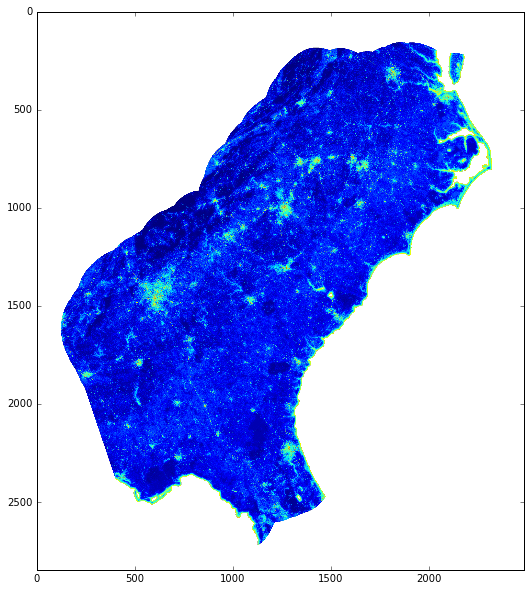

In [4]:
R.display()

In [5]:
I = Raster.load("../bb450_sum_000031.asc")
I.shape

(2845, 2483)

/Users/eduffy/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


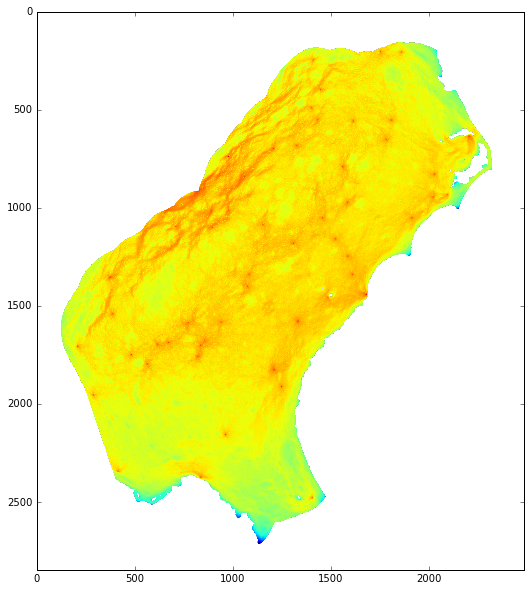

In [6]:
np.log(I).display()

In [7]:
V = np.multiply(I, R)  # element-wise multiplication

In [8]:
np.nanmin(V), np.nanmax(V)

(Raster(0.0), Raster(113.39173984137999))

In [9]:
volts = V.flatten()
volts = volts[~np.isnan(volts)]

In [10]:
np.histogram(volts, 100)

(array([2773966,   39027,    1980,     539,     170,      78,      45,
             30,      18,       9,      11,      10,       7,       3,
              2,       5,       5,       5,       4,       1,       3,
              2,       3,       1,       1,       0,       0,       0,
              0,       1,       1,       1,       1,       0,       1,
              2,       3,       0,       1,       0,       0,       0,
              0,       0,       0,       1,       0,       1,       0,
              0,       0,       0,       0,       1,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       1,       0,       0,
              0,       0,       0,       0,       1,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,       1,       0,       0,       0,       0,
      

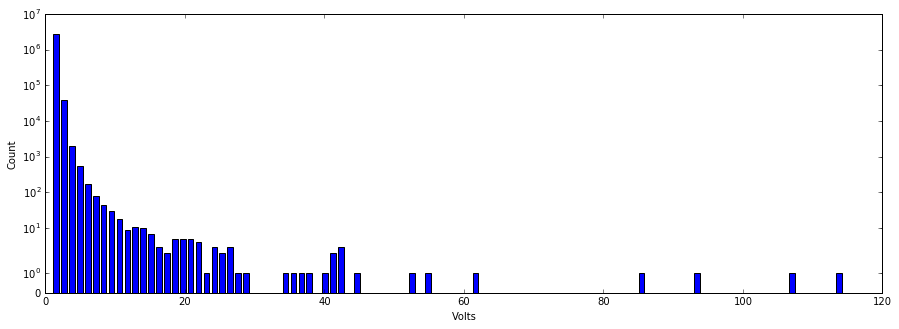

In [11]:
h,x = np.histogram(volts, 100)
plt.figure(figsize=(15, 5))
ax = plt.bar(x[1:], h)
plt.yscale("symlog")
plt.ylabel("Count")
plt.xlabel("Volts")

/Users/eduffy/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


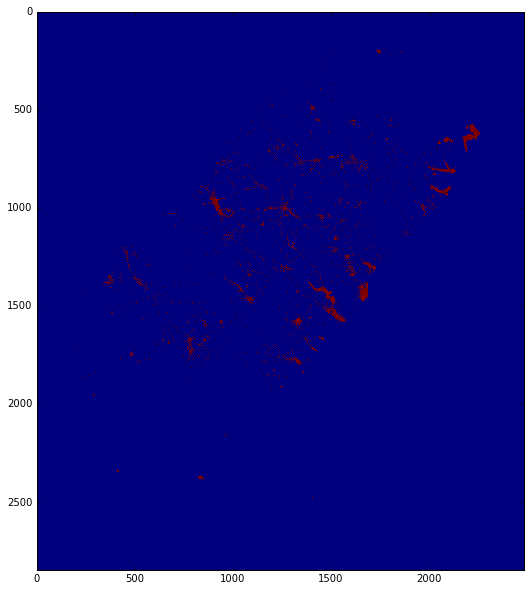

In [12]:
(V>1).display()